In [1]:
# Question 1 Part a & b

In [29]:
# Question 1 
from scipy.io import loadmat
import pandas as pd
import numpy as np
import math as math
import random as random
from sklearn import linear_model
from sklearn.cluster import KMeans

# Load data
dfX = loadmat('ion.mat')['X'].T
dfY = loadmat('ion.mat')['y']

trainX = loadmat('Ion.trin.mat')['Xtrain'].T
trainY = loadmat('Ion.trin.mat')['ytrain']


testX = loadmat('Ion.test.mat')['Xtest'].T
testY = loadmat('Ion.test.mat')['ytest']

#training = np.concatenate((trainX, trainY),axis =1 )
#tesing = np.concatenate((testX,testY),axis= 1)
#
#random.seed(2017)
#np.random.shuffle(training)


#trainX = training[:,0:33] 
#trainY=training[:,-1].reshape(176,1)

# Q1 Part a
# NN
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

random.seed(2017)
trainX = trainX[:,0:33]

                
def NN2(x, y, n, epoch,lr, l2_reg):
    # Initialize Necessary Weights
    u = np.random.uniform(-0.5, 0.5, (33, n))
    v = np.random.uniform(-0.5, 0.6, (n,))
    for epoch in range(epoch):
        for i in range(len(trainX)):
            # Setup Data
            y = trainY[i]

            # feedforward for each observation/row in X
            a_j = np.dot(trainX[i].reshape(1,33), u) # a_j[j] is 1 by n vector: linear comb output in hidden layer based on X[j]= n values
            z_j = sigmoid(a_j) # z_j[j] is 1 by n vector: sigmoid transformation output in hidden layer based on X[j]
            a_k = np.dot(z_j.reshape(1,n), v) # a_k[j] is 1 by 1 value in output layer
            z_k = sigmoid(a_k).flatten()[0] # z_k[j] is 1 by 1 value in output layer   
               
            # backpropagation
            v = v.reshape(1,n) + (2 * lr *(y - z_k) * (z_k * (1-z_k))) * z_j - (lr * (l2_reg * v)).reshape(1,n)
            v = v.reshape(n,1)
            
            a = ((2 * lr *(y - z_k) * (z_k * (1-z_k)))) # 4 by 1
            b = trainX[i].reshape(33,1) @ (a * z_j.reshape(n,1) * v * (z_j *(1-z_j)).reshape(n,1)).reshape(1,n)
            u = u + b - (lr * (l2_reg * u))
    return(u,v)


# Q1 part b
#weight = NN2(trainX, trainY, n = 4, epoch = 150, lr = 0.01, l2_reg = 0.0001)


def NN_epoch(n,epoch, lr, l2_reg):
    weight = NN2(trainX, trainY, n = n, epoch = epoch, lr = lr, l2_reg = l2_reg)

    # training accuracy & error
    y_hat_train = np.zeros(len(trainX))
    prediction_training = np.zeros(len(trainX))
    
    for i in range(len(trainX)):
        # Setup Data
        x = trainX[i]
    
        a_j = np.dot(x.reshape(1,33), weight[0]) # a_j[j] is 1 by 4 vector: linear comb output in hidden layer based on X[j]= 4 values
        z_j = sigmoid(a_j) # z_j[j] is 1 by 4 vector: sigmoid transformation output in hidden layer based on X[j]
        a_k = np.dot(z_j.reshape(1,n), weight[1]) # a_k[j] is 1 by 1 value in output layer
        z_k = sigmoid(a_k)
        y_hat_train[i] = z_k.flatten()[0]
        
        
        if y_hat_train[i]  >= 0.50:
            prediction_training[i] = 1
        else:
            prediction_training[i] = 0
    
    y_hat_test = np.zeros(len(testX))
    prediction_testing = np.zeros(len(testX))

    for i in range(len(testX)):
        # Setup Data
        x = testX[i]
     
        a_j1 = np.dot(x.reshape(1,33), weight[0]) # a_j[j] is 1 by 4 vector: linear comb output in hidden layer based on X[j]= 4 values
        z_j1 = sigmoid(a_j1) # z_j[j] is 1 by 4 vector: sigmoid transformation output in hidden layer based on X[j]
        a_k1 = np.dot(z_j1.reshape(1,n), weight[1]) # a_k[j] is 1 by 1 value in output layer
        z_k1 = sigmoid(a_k1)
        y_hat_test[i] = z_k1.flatten()[0]
        
        
        if y_hat_test[i]  >= 0.50:
            prediction_testing[i] = 1
        else:
            prediction_testing[i] = 0
    test_E = 1 - ((np.sum(prediction_testing == np.ravel(testY)))/ len(prediction_testing))
    train_E = 1 - ((np.sum(prediction_training == np.ravel(trainY)))/ len(prediction_training))
    return (train_E,test_E, prediction_testing)

In [25]:
results4_train_E = []
results4_test_E = []
for i in range(50, 900, 50):
    results4_train_E.append(NN_epoch(n = 4, epoch = i, lr = 0.01, l2_reg = 0.000001)[0])
    results4_test_E.append(NN_epoch(n = 4, epoch = i, lr = 0.01, l2_reg = 0.000001)[1])

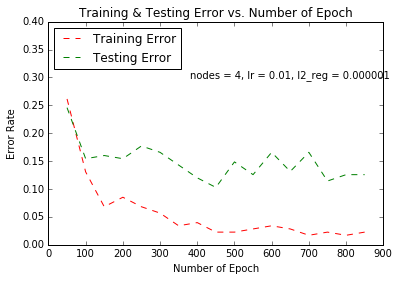

In [26]:
# for n = 4, epoch = 50:900, lr = 0.01, l2_reg = 0.000001
import matplotlib.pyplot as plt
plt.plot(range(50, 900, 50), results4_train_E, 'r--')
plt.axis([0, 900, 0, 0.4])

# testing error curve
plt.plot(range(50, 900, 50), results4_test_E, 'r--', color='green')
plt.axis([0, 900, 0, 0.4])
plt.legend(['Training Error', 'Testing Error'], loc='upper left')
plt.title('Training & Testing Error vs. Number of Epoch')
plt.xlabel('Number of Epoch')
plt.ylabel('Error Rate')
plt.text(380, 0.3, 'nodes = 4, lr = 0.01, l2_reg = 0.000001')
plt.show()

In [2]:
results1_train_E = []
results1_test_E = []
for i in range(50, 900, 50):
    results1_train_E.append(NN_epoch(n = 4, epoch = i, lr = 0.01, l2_reg = 0.0001)[0])
    results1_test_E.append(NN_epoch(n = 4, epoch = i, lr = 0.01, l2_reg = 0.0001)[1])

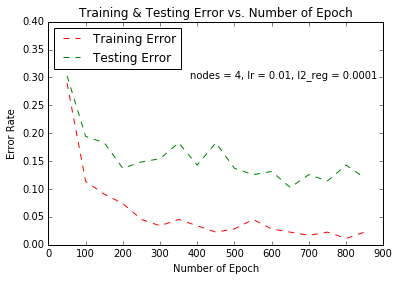

In [13]:
# for n = 4, epoch = 50:900, lr = 0.01, l2_reg = 0.0001
import matplotlib.pyplot as plt
plt.plot(range(50, 900, 50), results1_train_E, 'r--')
plt.axis([0, 900, 0, 0.4])

# testing error curve
plt.plot(range(50, 900, 50), results1_test_E, 'r--', color='green')
plt.axis([0, 900, 0, 0.4])
plt.legend(['Training Error', 'Testing Error'], loc='upper left')
plt.title('Training & Testing Error vs. Number of Epoch')
plt.xlabel('Number of Epoch')
plt.ylabel('Error Rate')
plt.text(380, 0.3, 'nodes = 4, lr = 0.01, l2_reg = 0.0001')
plt.show()

In [14]:
results2_train_E = []
results2_test_E = []
for i in range(50, 900, 50):
    results2_train_E.append(NN_epoch(n = 4, epoch = i, lr = 0.01, l2_reg = 0.001)[0])
    results2_test_E.append(NN_epoch(n = 4, epoch = i, lr = 0.01, l2_reg = 0.001)[1])

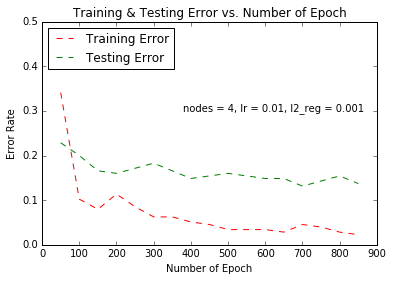

In [16]:
# for n = 4, epoch = 50:900, lr = 0.01, l2_reg = 0.001
import matplotlib.pyplot as plt
plt.plot(range(50, 900, 50), results2_train_E, 'r--')
plt.axis([0, 900, 0, 0.5])

# testing error curve
plt.plot(range(50, 900, 50), results2_test_E, 'r--', color='green')
plt.axis([0, 900, 0, 0.5])
plt.legend(['Training Error', 'Testing Error'], loc='upper left')
plt.title('Training & Testing Error vs. Number of Epoch')
plt.xlabel('Number of Epoch')
plt.ylabel('Error Rate')
plt.text(380, 0.3, 'nodes = 4, lr = 0.01, l2_reg = 0.001')
plt.show()

In [22]:
results3_train_E = []
results3_test_E = []
for i in range(50, 900, 50):
    results3_train_E.append(NN_epoch(n = 4, epoch = i, lr = 0.01, l2_reg = 0.01)[0])
    results3_test_E.append(NN_epoch(n = 4, epoch = i, lr = 0.01, l2_reg = 0.01)[1])

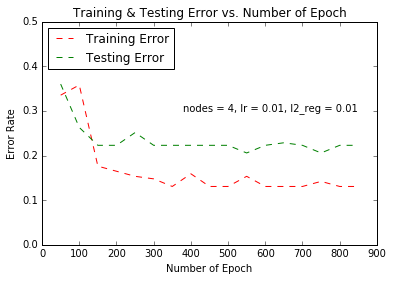

In [23]:
# for n = 4, epoch = 50:900, lr = 0.01, l2_reg = 0.01
import matplotlib.pyplot as plt
plt.plot(range(50, 900, 50), results3_train_E, 'r--')
plt.axis([0, 900, 0, 0.5])

# testing error curve
plt.plot(range(50, 900, 50), results3_test_E, 'r--', color='green')
plt.axis([0, 900, 0, 0.5])
plt.legend(['Training Error', 'Testing Error'], loc='upper left')
plt.title('Training & Testing Error vs. Number of Epoch')
plt.xlabel('Number of Epoch')
plt.ylabel('Error Rate')
plt.text(380, 0.3, 'nodes = 4, lr = 0.01, l2_reg = 0.01')
plt.show()

In [35]:
# Question 1 Part c

In [27]:
results5_train_E = []
results5_test_E = []
for i in range(1, 200, 10):
    results5_train_E.append(NN_epoch(n = i, epoch = 450, lr = 0.01, l2_reg = 0)[0])
    results5_test_E.append(NN_epoch(n = i, epoch = 450, lr = 0.01, l2_reg = 0)[1])

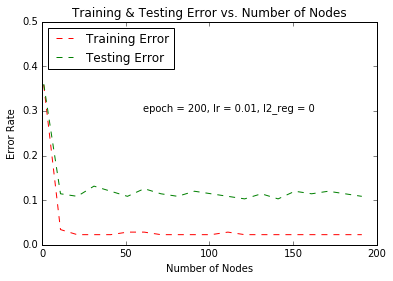

In [28]:
# for n = 1:100, epoch = 300, lr = 0.01, l2_reg = 0
import matplotlib.pyplot as plt
plt.plot(range(1, 200, 10), results5_train_E, 'r--')
plt.axis([0, 200, 0, 0.5])

# testing error curve
plt.plot(range(1, 200, 10), results5_test_E, 'r--', color='green')
plt.axis([0, 200, 0, 0.5])
plt.legend(['Training Error', 'Testing Error'], loc='upper left')
plt.title('Training & Testing Error vs. Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Error Rate')
plt.text(60, 0.3, 'epoch = 200, lr = 0.01, l2_reg = 0')
plt.show()

# nodes= 10-20 seems better

In [ ]:
# Question 1 Part d
# With no weight decay, the best model while fixing epoch = 300, lr = 0.01 is nodes = 10. This gives about 12% testing error. 

In [4]:
# use nodes = 10 lr = 0.01 le_reg = 0 epoch = 300
results_final1 = NN_epoch(n = 10, epoch = 300, lr = 0.01, l2_reg = 0)

In [14]:
ypred_test = results_final1[2]
y00 = 0
y01 = 0
y10 = 0
y11 = 0

for j, h in enumerate(ypred_test):
    if ypred_test[j] == 1:
        if ypred_test[j] == np.ravel(testY)[j]:
            y11 = y11 + 1
        else: y10 = y10 + 1
    else: 
        if ypred_test[j] == np.ravel(testY)[j]:
            y00 = y00 + 1
        else: y01 = y01 +1
print(y00,y01,y10,y11)

111 24 1 39


In [33]:
print('Training Error for nodes = 10 lr = 0.01 le_reg = 0 epoch = 300 is',results_final1[0] *100, "%")
print('Training Accuracy for nodes = 10 lr = 0.01 le_reg = 0 epoch = 300 is',(1-results_final1[0])*100, "%")

print('Testing Error for nodes = 10 lr = 0.01 le_reg = 0 epoch = 300 is',results_final1[1]*100, "%")
print('Testing Accuracy for nodes = 10 lr = 0.01 le_reg = 0 epoch = 300 is',(1-results_final1[1])*100, "%")

Training Error for nodes = 10 lr = 0.01 le_reg = 0 epoch = 300 is 3.40909090909 %
Training Accuracy for nodes = 10 lr = 0.01 le_reg = 0 epoch = 300 is 96.5909090909 %
Testing Error for nodes = 10 lr = 0.01 le_reg = 0 epoch = 300 is 10.8571428571 %
Testing Accuracy for nodes = 10 lr = 0.01 le_reg = 0 epoch = 300 is 89.1428571429 %


In [ ]:
# With 0.000001 weight decay, the best model while fixing epoch = 500, lr = 0.01 is nodes = 10. This gives about 10% testing error. 

In [103]:
results9_train_E = []
results9_test_E = []
for i in range(50, 900, 50):
    results9_train_E.append(NN_epoch(n = 10, epoch = i, lr = 0.01, l2_reg =  0.000001)[0])
    results9_test_E.append(NN_epoch(n = 10, epoch = i, lr = 0.01, l2_reg =  0.000001)[1])

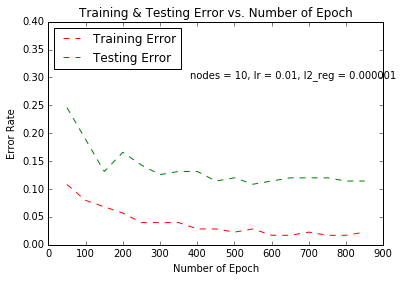

In [106]:
# for n = 10, epoch = 50:900, lr = 0.01, l2_reg = 0.000001
import matplotlib.pyplot as plt
plt.plot(range(50, 900, 50), results9_train_E, 'r--')
plt.axis([0, 900, 0, 0.4])

# testing error curve
plt.plot(range(50, 900, 50), results9_test_E, 'r--', color='green')
plt.axis([0, 900, 0, 0.4])
plt.legend(['Training Error', 'Testing Error'], loc='upper left')
plt.title('Training & Testing Error vs. Number of Epoch')
plt.xlabel('Number of Epoch')
plt.ylabel('Error Rate')
plt.text(380, 0.3, 'nodes = 10, lr = 0.01, l2_reg = 0.000001')
plt.show()

In [20]:
# use nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 300
results_final2 = NN_epoch(n = 10, epoch = 500, lr = 0.01, l2_reg = 0.000001)

print('Training Error for nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 500 is',results_final2[0] *100, "%")
print('Training Accuracy for nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 500 is',(1-results_final2[0])*100, "%")

print('Testing Error for nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 500 is',results_final2[1]*100, "%")
print('Testing Accuracy for nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 500 is',(1-results_final2[1])*100, "%")

Training Error for nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 500 is 2.27272727273 %
Training Accuracy for nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 500 is 97.7272727273 %
Testing Error for nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 500 is 10.8571428571 %
Testing Accuracy for nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 500 is 89.1428571429 %


In [21]:
ypred_test = results_final2[2]
y00 = 0
y01 = 0
y10 = 0
y11 = 0

for j, h in enumerate(ypred_test):
    if ypred_test[j] == 1:
        if ypred_test[j] == np.ravel(testY)[j]:
            y11 = y11 + 1
        else: y10 = y10 + 1
    else: 
        if ypred_test[j] == np.ravel(testY)[j]:
            y00 = y00 + 1
        else: y01 = y01 +1
print(y00,y01,y10,y11)

111 18 1 45


In [ ]:
# As we can see below, smaller l2_reg (i.e. 0.00000001), the testing error is larger

In [23]:
# use nodes = 10 lr = 0.01 le_reg = 0.000001 epoch = 300
rm1 = NN_epoch(n = 10, epoch = 500, lr = 0.01, l2_reg = 0.00000001)

print('Training Error for nodes = 10 lr = 0.01 le_reg = 0.00000001 epoch = 500 is',rm1[0] *100, "%")
print('Training Accuracy for nodes = 10 lr = 0.01 le_reg = 0.00000001 epoch = 500 is',(1-rm1[0])*100, "%")

print('Testing Error for nodes = 10 lr = 0.01 le_reg =0.00000001 epoch = 500 is',rm1[1]*100, "%")
print('Testing Accuracy for nodes = 10 lr = 0.01 le_reg = 0.00000001 epoch = 500 is',(1-rm1[1])*100, "%")

Training Error for nodes = 10 lr = 0.01 le_reg = 0.001 epoch = 500 is 2.27272727273 %
Training Accuracy for nodes = 10 lr = 0.01 le_reg = 0.001 epoch = 500 is 97.7272727273 %
Testing Error for nodes = 10 lr = 0.01 le_reg = 0.001 epoch = 500 is 13.7142857143 %
Testing Accuracy for nodes = 10 lr = 0.01 le_reg = 0.001 epoch = 500 is 86.2857142857 %


In [97]:
# Question 2 Part a 

In [2]:
# Load data
dfX = loadmat('ion.mat')['X'].T
dfY = loadmat('ion.mat')['y']

In [3]:
from sklearn.cluster import KMeans
def RBF(m):
    # K-means Clustering
    kmeans = KMeans(n_clusters=m, random_state=0).fit(dfX)
#    kmeans.labels_
#    kmeans.cluster_centers_  # m by 34
#    kmeans.inertia_ / len(dfX) # sigma^2
    dfX_KM = np.concatenate((dfX,kmeans.labels_.reshape(351,1)),axis= 1)
    
    sigma2 = kmeans.inertia_ / len(dfX)
    phi = np.zeros((1,m))
    phi_final = np.zeros((351,m))
    for i in range(0,351):
        phi = np.zeros((1,m))
        for j in range(0,m):
            x = dfX[i] # 34 by 1
            uj =  kmeans.cluster_centers_[j] # 34 by 1
            rm = np.linalg.norm(x - uj)
            phi[0,j] = np.exp(-(rm)/sigma2)
        phi_final[i] = phi 
    print("Shape of phi_final matrix is",phi_final.shape)
    #phi_final.shape
    #dfY.shape    
    
    dfY_c = np.zeros(shape = (0,2))
    for i in range(0,351):
        if dfY[i] == 0:
            dfY_c = np.vstack([dfY_c,[1,0]])
        if dfY[i] == 1:
            dfY_c = np.vstack([dfY_c,[0,1]])  
#    dfY_c.shape
    
    phi_final = phi_final.T
    weights = (np.dot(np.linalg.inv(phi_final.dot(phi_final.T)).dot(phi_final),dfY_c)).T
    print("Shape of Weights matrix is",weights.shape)
    
    yhat_training = np.dot(weights, phi_final)
    prediction_training_RBF = np.zeros(351)
    
    for i in range(351):
        if yhat_training[0][i]  >= 0.50 or yhat_training[1][i] < 0.05:
            prediction_training_RBF[i] = 0
        else:
            prediction_training_RBF[i] = 1
    
    # training error: 0.4757834757834758 m = 5
    train_E_RBF = 1 - ((np.sum(prediction_training_RBF == np.ravel(dfY)))/ len(prediction_training_RBF))
    return(train_E_RBF)

# m = 4 Training Error = 0.13105413105413111
Error = RBF(m= 4)
Error

Shape of phi_final matrix is (351, 4)
Shape of Weights matrix is (2, 4)


0.13105413105413111

In [ ]:
# Question 2 Part b
# 10-fold CV

In [27]:
def CV_10F(x, y, m, seed):
    df = np.concatenate((x,y),axis =1)
    random.seed(seed)
    np.random.shuffle(df)
    dfXa = df[:,0:34]
    dfYa = df[:,-1]

    a, b,c,d,e,f,g,h,i,j =  np.split(dfXa, [int(.1 * len(dfXa)), int(.2 * len(dfXa)),int(.3 * len(dfXa)), int(.4 * len(dfXa)),int(.5 * len(dfXa)), int(.6 * len(dfXa)),int(.7 * len(dfXa)), int(.8 * len(dfXa)),int(.9 * len(dfXa))])
    
    a = np.append(a, np.repeat(0,len(a)).reshape(len(a),1), 1)
    b = np.append(b, np.repeat(1,len(b)).reshape(len(b),1), 1)
    c = np.append(c, np.repeat(2,len(c)).reshape(len(c),1), 1)
    d = np.append(d, np.repeat(3,len(d)).reshape(len(d),1), 1)
    e = np.append(e, np.repeat(4,len(e)).reshape(len(e),1), 1)
    f = np.append(f, np.repeat(5,len(f)).reshape(len(f),1), 1)
    g = np.append(g, np.repeat(6,len(g)).reshape(len(g),1), 1)
    h = np.append(h, np.repeat(7,len(h)).reshape(len(h),1), 1)
    i = np.append(i, np.repeat(8,len(i)).reshape(len(i),1), 1)
    j = np.append(j, np.repeat(9,len(j)).reshape(len(j),1), 1)
    
    dfX1 = np.concatenate((a, b,c,d,e,f,g,h,i,j)) # 351 by 35 where last column is fold labels
    Errors = np.zeros(shape = (10,2))
    
    for k in range(0,10): 
        dfX_val = dfX1[np.where(dfX1[:,-1] == k)[0]]
        dfX_val = np.delete(dfX_val, -1, 1)
        
        dfX_train = dfX1[np.where(dfX1[:,-1] != k)[0]]
        dfX_train = np.delete(dfX_train, -1, 1)
        
        size_total = len(dfX1)
        size_trin = len(dfX_train)
        size_val = len(dfX_val)
        
        # K-means Clustering
        kmeans = KMeans(n_clusters=m, random_state=0).fit(dfX_train)   
        sigma2 = kmeans.inertia_ / len(dfX_train)
        
        phi_trin = np.zeros((1,m))
        phi_trin_final = np.zeros((size_trin,m))
        for i in range(0,size_trin):
            phi_trin = np.zeros((1,m))
            for j in range(0,m):
                x = dfX_train[i] # 34 by 1
                uj =  kmeans.cluster_centers_[j] # 34 by 1
                rm = np.linalg.norm(x - uj)
                phi_trin[0,j] = np.exp(-(rm)/sigma2)
            phi_trin_final[i-size_val] = phi_trin 
#         print("Shape of phi_trin_final matrix is",phi_trin_final.shape)
        phi_trin_final = phi_trin_final.T
    
        dfY_trin = np.zeros(shape = (0,2))
        for i in range(size_val,size_total):
            if dfYa[i] == 0:
                dfY_trin = np.vstack([dfY_trin,[1,0]])
            if dfYa[i] == 1:
                dfY_trin = np.vstack([dfY_trin,[0,1]])
#         print("Shape of dfY_trin is",dfY_trin.shape)
    
        
        weights = (np.dot(np.linalg.inv(phi_trin_final.dot(phi_trin_final.T)).dot(phi_trin_final),dfY_trin)).T
#         print("Shape of Weights matrix is",weights.shape)
        
        #predict training set
        yhat_training = np.dot(weights, phi_trin_final)
        prediction_training_RBF = np.zeros(size_trin)
        
        for i in range(size_trin):
            if yhat_training[0][i]  >= 0.50 or yhat_training[1][i] < 0.05:
                prediction_training_RBF[i] = 0
            else:
                prediction_training_RBF[i] = 1
        
        # convert validation set's X into phi_val_final
        phi_val = np.zeros((1,m))
        phi_val_final = np.zeros((size_val,m))
        for i in range(0,size_val):
            phi_val = np.zeros((1,m))
            for j in range(0,m):
                x = dfX_val[i] # 34 by 1
                uj =  kmeans.cluster_centers_[j] # 34 by 1
                rm = np.linalg.norm(x - uj)
                phi_val[0,j] = np.exp(-(rm)/sigma2)
            phi_val_final[i] = phi_val 
#         print("Shape of phi_val_final matrix is",phi_val_final.shape)
        phi_val_final = phi_val_final.T
        
        dfY_val = np.zeros(shape = (0,2))
        for i in range(0,size_val):
            if dfYa[i] == 0:
                dfY_val = np.vstack([dfY_val,[1,0]])
            if dfYa[i] == 1:
                dfY_val = np.vstack([dfY_val,[0,1]])  
                 
        # predict on validation set
        yhat_testing = np.dot(weights, phi_val_final)
        prediction_testing_RBF = np.zeros(size_val)
        
        for i in range(size_val):
            if yhat_testing[0][i]  >= 0.50 or yhat_testing[1][i] < 0.05:
                prediction_testing_RBF[i] = 0
            else:
                prediction_testing_RBF[i] = 1
        
        # training error: 0.4757834757834758 m = 5
        Errors[k][0] = 1 - ((np.sum(prediction_training_RBF == np.ravel(dfYa[size_val:size_total])))/ len(prediction_training_RBF))
        Errors[k][1]  = 1 - ((np.sum(prediction_testing_RBF == np.ravel(dfYa[0:size_val])))/ len(prediction_testing_RBF))
    return(Errors)

In [32]:
# 10 Fold CV Training and Testing errors for each fold
# these results are unstable but my answers in the table are based on the following results: 
# choose number of basis function that yield the lowest testing error, which in this case is m=4
cv10_error_m5 = CV_10F(x=dfX, y=dfY, m=5, seed=1234)
print('Training Error for 10-Fold CV with m = 5 is',np.mean(cv10_error_m5[:,0]))
print('Testing Error for 10-Fold CV with m = 5 is',np.mean(cv10_error_m5[:,1]))

cv10_error_m4 = CV_10F(x=dfX, y=dfY, m=4, seed=1234)
print('Training Error for 10-Fold CV with m = 4 is',np.mean(cv10_error_m4[:,0]))
print('Testing Error for 10-Fold CV with m = 4 is',np.mean(cv10_error_m4[:,1]))


cv10_error_m3 = CV_10F(x=dfX, y=dfY, m=3, seed=1234)
print('Training Error for 10-Fold CV with m = 3 is',np.mean(cv10_error_m3[:,0]))
print('Testing Error for 10-Fold CV with m = 3 is',np.mean(cv10_error_m3[:,1]))

cv10_error_m2 = CV_10F(x=dfX, y=dfY, m=2, seed=1234)
print('Training Error for 10-Fold CV with m = 2 is',np.mean(cv10_error_m2[:,0]))
print('Testing Error for 10-Fold CV with m = 2 is',np.mean(cv10_error_m2[:,1]))


Training Error for 10-Fold CV with m = 7 is 0.2946644565
Testing Error for 10-Fold CV with m = 7 is 0.350396825397
Training Error for 10-Fold CV with m = 5 is 0.27980008037
Testing Error for 10-Fold CV with m = 5 is 0.435476190476
Training Error for 10-Fold CV with m = 4 is 0.295621860559
Testing Error for 10-Fold CV with m = 4 is 0.46119047619
Training Error for 10-Fold CV with m = 3 is 0.33424954792
Testing Error for 10-Fold CV with m = 3 is 0.367380952381
Training Error for 10-Fold CV with m = 2 is 0.35738798473
Testing Error for 10-Fold CV with m = 2 is 0.373095238095


In [ ]:
# Question 2 Part b LOO

In [8]:
def LOO(x,y,m,seed):
    # randomly shuffle dataset before doing LOO
    df = np.concatenate((x,y),axis =1)
    random.seed(seed)
    np.random.shuffle(df)
    dfXa = df[:,0:34]
    dfYa = df[:,-1]
    
    Errors_LOO = np.zeros(shape = (351,2))
    
    for k in range(0,351): 
        dfX_val = dfXa[k,:]
        dfX_train = dfXa[np.arange(len(dfXa))!=k]
      
        size_total = len(dfXa)
        size_trin = len(dfX_train)
        size_val = 1
        
        # K-means Clustering
        kmeans = KMeans(n_clusters=m, random_state=0).fit(dfX_train)   
        sigma2 = kmeans.inertia_ / len(dfX_train)
        
        phi_trin = np.zeros((1,m))
        phi_trin_final = np.zeros((size_trin,m))
        for i in range(0,size_trin):
            phi_trin = np.zeros((1,m))
            for j in range(0,m):
                x = dfX_train[i] # 34 by 1
                uj =  kmeans.cluster_centers_[j] # 34 by 1
                rm = np.linalg.norm(x - uj)
                phi_trin[0,j] = np.exp(-(rm)/sigma2)
            phi_trin_final[i-size_val] = phi_trin 
#         print("Shape of phi_trin_final matrix is",phi_trin_final.shape)
        phi_trin_final = phi_trin_final.T
    
        dfY_trin = np.zeros(shape = (0,2))
        for i in range(size_val,size_total):
            if dfYa[i] == 0:
                dfY_trin = np.vstack([dfY_trin,[1,0]])
            if dfYa[i] == 1:
                dfY_trin = np.vstack([dfY_trin,[0,1]])
#         print("Shape of dfY_trin is",dfY_trin.shape)
    
        
        weights = (np.dot(np.linalg.inv(phi_trin_final.dot(phi_trin_final.T)).dot(phi_trin_final),dfY_trin)).T
#         print("Shape of Weights matrix is",weights.shape)
        
        #predict training set
        yhat_training = np.dot(weights, phi_trin_final)
        prediction_training_RBF = np.zeros(size_trin)
        
        for i in range(size_trin):
            if yhat_training[0][i]  >= 0.50 or yhat_training[1][i] < 0.05:
                prediction_training_RBF[i] = 0
            else:
                prediction_training_RBF[i] = 1
        
        # convert validation set's X into phi_val_final
        phi_val = np.zeros((1,m))
        phi_val_final = np.zeros((size_val,m))
        for i in range(0,size_val):
            phi_val = np.zeros((1,m))
            for j in range(0,m):
                x = dfX_val[i] # 34 by 1
                uj =  kmeans.cluster_centers_[j] # 34 by 1
                rm = np.linalg.norm(x - uj)
                phi_val[0,j] = np.exp(-(rm)/sigma2)
            phi_val_final[i] = phi_val 
#         print("Shape of phi_val_final matrix is",phi_val_final.shape)
        phi_val_final = phi_val_final.T
        
        dfY_val = np.zeros(shape = (0,2))
        for i in range(0,size_val):
            if dfYa[i] == 0:
                dfY_val = np.vstack([dfY_val,[1,0]])
            if dfYa[i] == 1:
                dfY_val = np.vstack([dfY_val,[0,1]])  
                 
        # predict on validation set
        yhat_testing = np.dot(weights, phi_val_final)
        prediction_testing_RBF = np.zeros(size_val)
        
        for i in range(size_val):
            if yhat_testing[0][i]  >= 0.50 or yhat_testing[1][i] < 0.05:
                prediction_testing_RBF[i] = 0
            else:
                prediction_testing_RBF[i] = 1
        
        # training error& testing error
        Errors_LOO[k][0] = 1 - ((np.sum(prediction_training_RBF == np.ravel(dfYa[size_val:size_total])))/ len(prediction_training_RBF))
        Errors_LOO[k][1]  = 1 - ((np.sum(prediction_testing_RBF == np.ravel(dfYa[0:size_val])))/ len(prediction_testing_RBF))
    return(Errors_LOO)



In [12]:
# these results are unstable but my answers in the table for LOO are based on the following results: 
# choose number of basis function that yield the lowest testing error, which in this case is m=4
Errors_LOO_m2 = LOO(x=dfX,y=dfY,m=2,seed=1234)
print('Training Error for LOOCV with m = 2 is',np.mean(Errors_LOO_m2[:,0]))
print('Testing Error for LOOCV with m = 2 is',np.mean(Errors_LOO_m2[:,1]))


Errors_LOO_m3 = LOO(x=dfX,y=dfY,m=3,seed=1234)
print('Training Error for LOOCV with m = 3 is',np.mean(Errors_LOO_m3[:,0]))
print('Testing Error for LOOCV with m = 3 is',np.mean(Errors_LOO_m3[:,1]))


Errors_LOO_m4 = LOO(x=dfX,y=dfY,m=4,seed=1234)
print('Training Error for LOOCV with m = 4 is',np.mean(Errors_LOO_m4[:,0]))
print('Testing Error for LOOCV with m = 4 is',np.mean(Errors_LOO_m4[:,1]))

Errors_LOO_m5 = LOO(x=dfX,y=dfY,m=5,seed=1234)
print('Training Error for LOOCV with m = 5 is',np.mean(Errors_LOO_m5[:,0]))
print('Testing Error for LOOCV with m = 5 is',np.mean(Errors_LOO_m5[:,1]))


Training Error for LOOCV with m = 2 is 0.357720797721
Testing Error for LOOCV with m = 2 is 0.524216524217
Training Error for LOOCV with m = 3 is 0.292055352055
Testing Error for LOOCV with m = 3 is 0.578347578348
Training Error for LOOCV with m = 4 is 0.278201058201
Testing Error for LOOCV with m = 4 is 0.165242165242
Training Error for LOOCV with m = 5 is 0.260170940171
Testing Error for LOOCV with m = 5 is 0.19943019943


In [13]:
# Question 2 part b CLOO

In [34]:
# k is the index of the point we want to leave out; it can be any number between 0 & number of observations in the dataset (= 351)
def CLOO(x, y, m, seed, k):
    dfXa = x
    dfYa = y
    
    # because of 1 row of zero in dfX that will cause invertibility when calculating H matrix, I removed it during CLOO    
    dfXa = np.delete(dfXa, 1, 1)
    H = (dfXa.dot(np.linalg.inv(np.transpose(dfXa).dot(dfXa))).dot(dfXa.T))[k,k]
  
    dfX_val = dfXa[k,:]
    dfY_val = dfYa[k]

      
    size_total = len(dfXa)
#    size_trin = len(dfX_train)
#    size_val = 1
    
    # training model/weights based on all Xi's
    # K-means Clustering
    kmeans = KMeans(n_clusters=m, random_state=0).fit(dfXa)   
    sigma2 = kmeans.inertia_ / len(dfXa)
    
    phi_trin = np.zeros((1,m))
    phi_trin_final = np.zeros((size_total,m))
    for i in range(0,size_total):
        phi_trin = np.zeros((1,m))
        for j in range(0,m):
            x = dfXa[i] # 34 by 1
            uj =  kmeans.cluster_centers_[j] # 34 by 1
            rm = np.linalg.norm(x - uj)
            phi_trin[0,j] = np.exp(-(rm)/sigma2)
        phi_trin_final[i] = phi_trin 
#     print("Shape of phi_trin_final matrix is",phi_trin_final.shape)
    phi_trin_final = phi_trin_final.T

    dfY_trin = np.zeros(shape = (0,2))
    for i in range(0,size_total):
        if dfYa[i] == 0:
            dfY_trin = np.vstack([dfY_trin,[1,0]])
        if dfYa[i] == 1:
            dfY_trin = np.vstack([dfY_trin,[0,1]])
#     print("Shape of dfY_trin is",dfY_trin.shape)

    
    weights = (np.dot(np.linalg.inv(phi_trin_final.dot(phi_trin_final.T)).dot(phi_trin_final),dfY_trin)).T
#     print("Shape of Weights matrix is",weights.shape)
    
    #predict kth observation using weights obtained above
    # covert kth datapoint to phi_val
    phi_val = np.zeros((1,m))
    phi_val_final = np.zeros((1,m))
    for i in range(0,1):
        phi_val = np.zeros((1,m))
        for j in range(0,m):
            x = dfX_val[i] # 34 by 1
            uj =  kmeans.cluster_centers_[j] # 34 by 1
            rm = np.linalg.norm(x - uj)
            phi_val[0,j] = np.exp(-(rm)/sigma2)
        phi_val_final[i] = phi_val 
#     print("Shape of phi_val_final matrix is",phi_val_final.shape)
    phi_val_final = phi_val_final.T
    
    dfY_val = np.zeros(shape = (0,2))
    for i in range(0,1):
        if dfYa[i] == 0:
            dfY_val = np.vstack([dfY_val,[1,0]])
        if dfYa[i] == 1:
            dfY_val = np.vstack([dfY_val,[0,1]])  
    
    yhat_training = np.dot(weights, phi_val_final)
    prediction_training_RBF = np.zeros(1)
    
    for i in range(1):
        if yhat_training[0][i]  >= 0.50 or yhat_training[1][i] < 0.05:
            prediction_training_RBF[i] = 0
        else:
            prediction_training_RBF[i] = 1

  
    Error_CLOO = (dfYa[k] -prediction_training_RBF)/(1-H)
    return(Error_CLOO)

In [37]:
Error_CLOO_final = np.zeros(shape=(1,351))    
for i in range(0,351):
    Error_CLOO_final[0][i] = CLOO(x=dfX, y=dfY, m=4, seed=1234, k=i)
print('The Error calculated using CLOO',(np.sum(Error_CLOO_final != 0)/351)*100, "%")

The Error calculated using CLOO 25.0712250712 %
